# Anharmonic Oscillator Problem

In [1]:
import numpy as np #For Matrix Calculation
import matplotlib.pyplot as plt #For Plotting
import qutip as qt #For Quantum Mechanical Calculation
from tabulate import tabulate #Importing Tool for creating Table

In [2]:
#Making Grids for Positions 
a = -5
b = 5
N = 2000

X = np.linspace(a, b, N+1)
h = X[1] - X[0]

$$V_0(x) = \frac{1}{2}m\omega^2x^2$$
We chose $\omega = 1$ and $m = 1$

In [3]:
#Defining Unperturbed potential/ Harmonic Oscillator Potential
def V0(x):
    return (x**2)/2

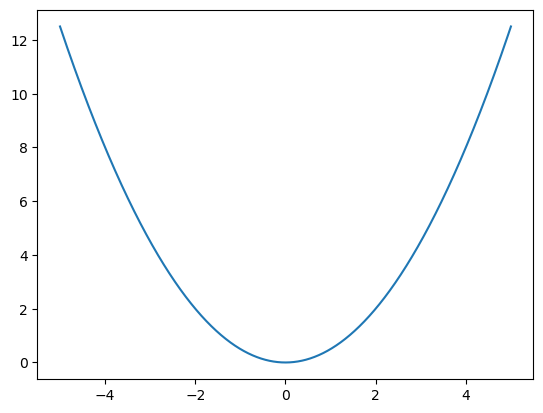

In [4]:
#Plotting Potential Function
Y = V0(X)
plt.plot(X, Y)
plt.show()

# Finite Difference Method for Solving Schrodinger Equation 

The Schrodinger Equation for SHO would be (taking $\hbar = 1$)

$$-\frac{1}{2}\frac{d^2 \psi}{dx^2} + \frac{1}{2}x^2 \psi = E\psi$$

Now for creating the matrix for this Hamiltonian, we need following matrix

$$A =  \begin{bmatrix}
    -2 & 1 & 0 & \cdots & 0 \\
    1 & -2 & 1 & \cdots & 0 \\
    0 & 1 & -2 & \cdots & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0& \cdots & -2
\end{bmatrix}$$

In [5]:
#Making A matrix
A = np.zeros([N-1, N-1])

for i in range(0, N-1):
    A[i, i] = -2
    
for i in range(1, N-1):
    A[i, i-1] = 1
    A[i-1, i] = 1

Now defining the matrix for potential energy

$$V = \begin{bmatrix}
    V_1 & 0 & 0 & \cdots & 0 \\
    0 & V_2 & 0 & \cdots & 0 \\
    0 & 0 & V_3 & \cdots & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0& \cdots & V_{N-1}
\end{bmatrix}$$

where $V_i = V_0(x_i)$

In [6]:
#Making Potential Energy Matrix
V = np.zeros([N-1,N-1])

for i in range(0, N-1):
    V[i, i] = V0(X[i+1])

Now the matrix for the Hamiltonian would be
$$H_0 = -\frac{1}{2h^2}A + B$$
Lets call $b = -\frac{1}{2h^2}$

In [7]:
b = -1/(2*(h**2))

#Unperturbed Hamiltonian
H0 = b*A + V

In [8]:
#Hamiltonian in Qutip
Ham0 = qt.Qobj(H0)

In [9]:
#Solving Unperturbed Hamiltonian Using Matrix Diagonalization
ES0 = Ham0.eigenstates()

In [10]:
#Printing the Energy Eigenvalues for first 10 states:
print(ES0[0][0:10])

[0.49999922 1.4999961  2.49998993 3.49998169 4.49998061 5.50005106
 6.5005359  7.50283935 8.51135627 9.53642523]


In [13]:
#Creating Appropriate Matrices for plotting wavefunctions

#Creating matrix of position of N-2 size
Xr = X[1:N]

#Extracting Eigenvectors
S0 = np.array(ES0[1][0])
S1 = np.array(ES0[1][1])
S3 = np.array(ES0[1][3])
S8 = np.array(ES0[1][8])

C:\Users\rohit\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


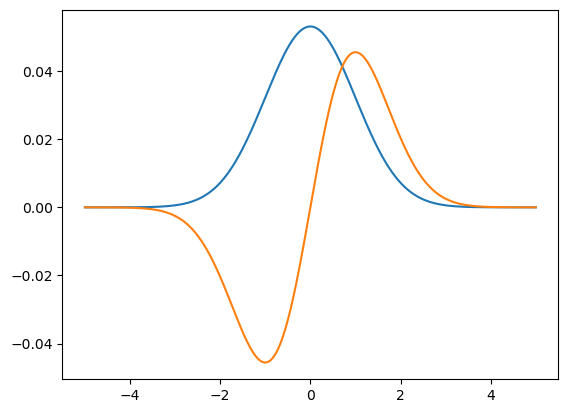

In [14]:
#Plotting Ground State and First Excited State
plt.plot(Xr, S0)
plt.plot(Xr, S1)
plt.show()

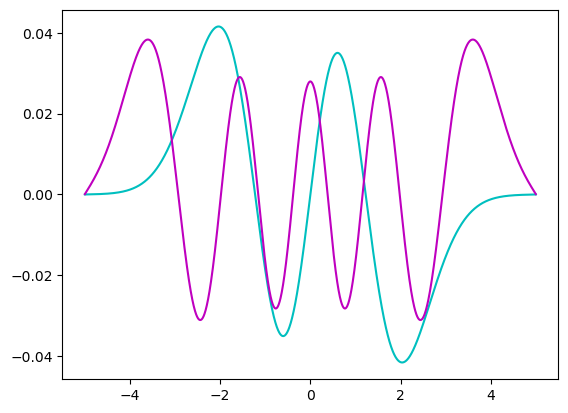

In [15]:
#Plotting Third and Eighth Excited State
plt.plot(Xr, S3, color='c')
plt.plot(Xr, S8, color='m')
plt.show()

# Perturbation to Hamiltonian

The Anharmonic perturbation to Haromic oscillator is
$$H_1 = \epsilon_1\left(\frac{x}{l}\right)^3 + \epsilon_2\left(\frac{x}{l}\right)^4$$
where $l = \sqrt{\hbar/\omega m} = 1$ (in our choice of units). Also, the epsilon is supposed to be small. I chose
$\epsilon_1 = \epsilon_2 = 0.5$

In [16]:
# Defining Perturbation Function
# We set l = 1 and \epsilon = 0.05

eps1 = 0.05

def Pert1(x):
    return eps1*(x**3)

eps2 = 0.05

def Pert2(x):
    return eps2*(x**4)

In [18]:
# Creating Perturbation Matrix
H1 = np.zeros([N-1, N-1])

for i in range(0, N-1):
    H1[i, i] = Pert1(X[i+1]) + Pert2(X[i+1])

In [19]:
#Complete Perturbed Hamiltonian in Qutip
Ham = Ham0 + qt.Qobj(H1)

In [20]:
#Solving Complete Hamiltonian using Matrix Diagonalization
ES1 = Ham.eigenstates()

In [21]:
#Printing energy Eigenvalues of the complete perturbed Hamiltonian
print(ES1[0][0:10])

[ 0.53065831  1.64384162  2.85486844  4.14752721  5.51096233  6.93736833
  8.42081834  9.95663006 11.54099277 13.1707334 ]


# Energy Correction Formula using Perturbation Theory

Following formulae are taken from the Flugge's Book

First Order Correction:
$$E_n^{(1)} = \frac{3}{4}\epsilon_2(2n^2 + 2n + 1)$$

Second Order Correction:
$$E_n^{(2)} = -\frac{\epsilon_1^2}{\hbar\omega}\frac{15}{4}\left(n^2 + n + \frac{11}{30}\right) - \frac{\epsilon_2^2}{\hbar\omega}\frac{1}{8}\left(34n^3+ 51n^2 + 59n + 20\right)$$

In [22]:
#Function for Calculating First and Second order Energy Correction for n-th eigenstate

def EC1(n):
    return (3/4)*eps2*((2*(n**2)) + 2*n + 1)

def EC2(n):
    aa = - (eps1**2)*(15/4)*((n**2) + n + (11/30))
    bb = - (eps2**2)*(1/8)*((34*(n**3)) + (51*(n**2)) + 59*n + 21)
    return aa + bb

In [23]:
#Calculating the Energy corrections, and comparing the net result from actual energy eigenvalues
header = ["E_n^{(0)}", "E_n^{(1)}", "E_n^{(2)}", "E_n^{(0)} + E_n^{(1)} + E_n^{(2)}", "Actual Energies (E_n)"]

Col1 = np.array(ES0[0][0:10])
Col2 = np.array([EC1(i) for i in range(10)])
Col3 = np.array([EC2(i) for i in range(10)])

Col4 = Col1 + Col2 + Col3
Col5 = np.array(ES1[0][0:10])

zipped_lists = zip(Col1, Col2, Col3, Col4, Col5)

#Printing List
print(tabulate(zipped_lists, header, tablefmt="fancy_grid"))

╒═════════════╤═════════════╤═════════════╤═════════════════════════════════════╤═════════════════════════╕
│   E_n^{(0)} │   E_n^{(1)} │   E_n^{(2)} │   E_n^{(0)} + E_n^{(1)} + E_n^{(2)} │   Actual Energies (E_n) │
╞═════════════╪═════════════╪═════════════╪═════════════════════════════════════╪═════════════════════════╡
│    0.499999 │      0.0375 │   -0.01     │                            0.527499 │                0.530658 │
├─────────────┼─────────────┼─────────────┼─────────────────────────────────────┼─────────────────────────┤
│    1.5      │      0.1875 │   -0.07375  │                            1.61375  │                1.64384  │
├─────────────┼─────────────┼─────────────┼─────────────────────────────────────┼─────────────────────────┤
│    2.49999  │      0.4875 │   -0.251875 │                            2.73561  │                2.85487  │
├─────────────┼─────────────┼─────────────┼─────────────────────────────────────┼─────────────────────────┤
│    3.49998  │      0.9375 

As we can see, the perturbation calculation of energy correction is deviating more and more for higher and higher excited states.

# Perturbative Calculation of Wavefunction

Brillouin-Wigner Perturbation Theory is used to calculate the wavefunctions here

In [24]:
#Identity matrix
In = np.identity(N-1)

#Projection Operators for states corresponding to n = 0, 1, 3, 8

P0 = np.outer(S0, S0)
P1 = np.outer(S1, S1)
P3 = np.outer(S3, S3)
P8 = np.outer(S8, S8)

In [25]:
#Defining Qn operator as Identity minus Projection

Q0 = In - P0
Q1 = In - P1
Q3 = In - P3
Q8 = In - P8

Define:

$$D(E) = (E\hat{I} - \hat{H}_0)^{-1}$$

In [26]:
#For Ground and First Excited states, I used the energies calculated using Perturbation theory because
#because they are pretty close to actual values for these state

E0 = 0.5 + EC1(0) + EC2(0)
E1 = 1.5 + EC1(1) + EC2(1)

#For Third and Eighth Excited states, I used actual energy values because perturbatively calculated values 
#are deviating a lot.

E3 = np.array(ES1[0][3])
E8 = np.array(ES1[0][8])
print(E3, E8)

#Defining D matrix for the same states

D0 = np.linalg.inv(E0*In - H0)
D1 = np.linalg.inv(E1*In - H0)
D3 = np.linalg.inv(E3*In - H0)
D8 = np.linalg.inv(E8*In - H0)

4.147527208083639 11.54099277496054


Now, the $R$ matrix is simply
$$R(E) = D(E) Q_n \equiv Q_nD(E)$$
But I defined $R$ matrix equivalently as
$$R(E) = \frac{D(E) Q_n + Q_nD(E)}{2}$$

In [27]:
#Creating R matrices

J0 = np.matmul(D0, Q0)
K0 = np.matmul(Q0, D0)
R0 = (J0 + K0)/2

J1 = np.matmul(D1, Q1)
K1 = np.matmul(Q1, D1)
R1 = (J1 + K1)/2

J3 = np.matmul(D3, Q3)
K3 = np.matmul(Q3, D3)
R3 = (J3 + K3)/2

J8 = np.matmul(D8, Q8)
K8 = np.matmul(Q8, D8)
R8 = (J8 + K8)/2

Now lets define
$$O(E) = R(E)H_1$$
and
$$T(E) = (1 - O(E))^{-1}$$

In [28]:
O0 = np.matmul(R0, H1)
O1 = np.matmul(R1, H1)
O3 = np.matmul(R3, H1)
O8 = np.matmul(R8, H1)

In [29]:
T0 = np.linalg.inv(In - O0)
T1 = np.linalg.inv(In - O1)
T3 = np.linalg.inv(In - O3)
T8 = np.linalg.inv(In - O8)

Finally, the perturbed wavefunction would be
$$\left|\psi_n\right> = T(E_n)\left|n\right>$$
where $\left|n\right>$ is the unperturbed wavefunction.

In [30]:
W0 = np.matmul(T0, S0)
W1 = np.matmul(T1, S1)
W3 = np.matmul(T3, S3)
W8 = np.matmul(T8, S8)

In [31]:
#Actual Wavefunction of the Perturbed Hamiltonian calculated using Matrix Diagonalization
Y0 = np.array(ES1[1][0])
Y1 = np.array(ES1[1][1])
Y3 = np.array(ES1[1][3])
Y8 = np.array(ES1[1][8])

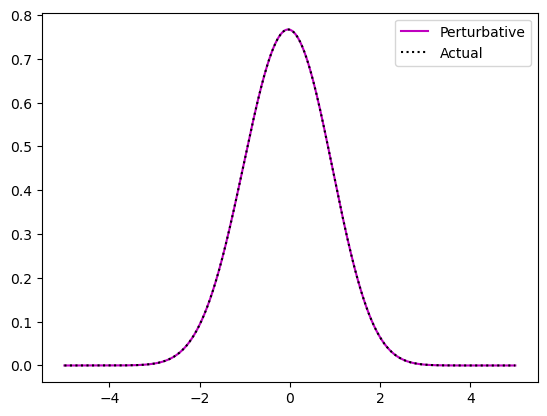

In [32]:
#Normalizing Plots
NW0 = np.sqrt(np.sum(W0**2)*h)
NY0 = np.sqrt(np.sum(Y0**2)*h)

plt.plot(Xr, W0/NW0, color='m') #Magenta Plot in Background Plot in Background
plt.plot(Xr, Y0/NY0, ':', color="black") #Black Dotted Plot in Frond
plt.legend(['Perturbative', 'Actual'])
plt.show()

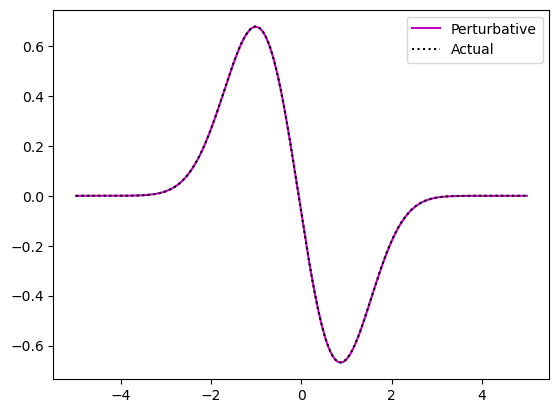

In [33]:
#Normalizing Plots
NW1 = np.sqrt(np.sum(W1**2)*h)
NY1 = np.sqrt(np.sum(Y1**2)*h)

plt.plot(Xr, -W1/NW1, color='m') #Magenta Plot in Background Plot in Background
plt.plot(Xr, Y1/NY1, ':', color="black") #Black Dotted Plot in Frond
plt.legend(['Perturbative', 'Actual'])
plt.show()

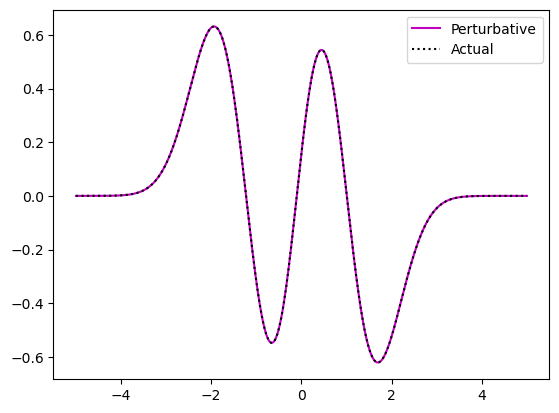

In [34]:
#Normalizing Plots
NW3 = np.sqrt(np.sum(W3**2)*h)
NY3 = np.sqrt(np.sum(Y3**2)*h)

plt.plot(Xr, W3/NW3, color='m') #Magenta Plot in Background Plot in Background
plt.plot(Xr, Y3/NY3, ':', color="black") #Black Dotted Plot in Frond
plt.legend(['Perturbative', 'Actual'])
plt.show()

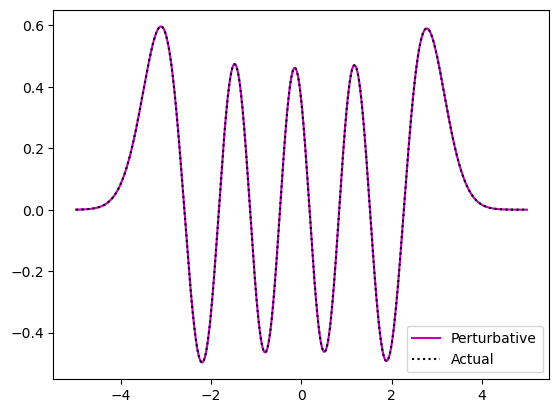

In [35]:
#Normalizing Plots
NW8 = np.sqrt(np.sum(W8**2)*h)
NY8 = np.sqrt(np.sum(Y8**2)*h)

plt.plot(Xr, W8/NW8, color='m') #Magenta Plot in Background Plot in Background
plt.plot(Xr, Y8/NY8, ':', color="black") #Black Dotted Plot in Frond
plt.legend(['Perturbative', 'Actual'])
plt.show()